# **Proyecto 2 – Parte II (Core)**
Proyecto 2: Análisis y Selección de Problema

Parte II: Preprocesamiento y Optimización

Objetivo: Realizar el preprocesamiento de datos y la optimización de modelos de machine learning para el conjunto de datos seleccionado. La meta es elegir la técnica de machine learning más adecuada y optimizar sus hiperparámetros para obtener el mejor rendimiento posible.

In [ ]:
# Importamos librerias
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


1. Limpieza de Datos:

Tratar los valores nulos utilizando técnicas adecuadas (imputación, eliminación, etc.).

Manejar los outliers mediante técnicas de filtrado o transformación.

In [ ]:
df_heart = pd.read_csv('heart.csv')


In [ ]:
df_heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,NaN,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Validamos existencia de nulos. En este caso tenemos uno en la columna 'age'
df_heart.isnull().sum()

,0
age,1
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


existe un valor nulo en la columna 'age' el que reemplazare por la media segun sexo

In [ ]:
# reemplazo el valor nulo por el promedio de edad por sexo
df_heart['age'].fillna(df_heart.groupby('sex')['age'].transform('mean'), inplace=True)


/tmp/ipython-input-5-467823585.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_heart['age'].fillna(df_heart.groupby('sex')['age'].transform('mean'), inplace=True)


In [ ]:
# validamos que se haya imputado el valor
df_heart.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


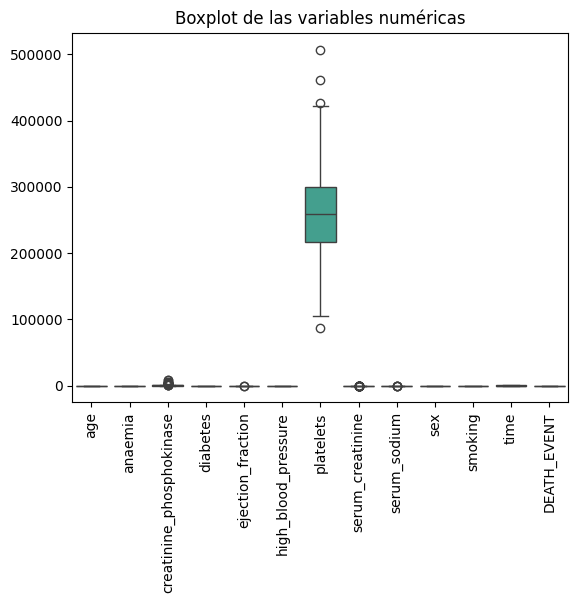

In [ ]:
# boxplot para el df de las variables numericas
sns.boxplot(data=df_heart.select_dtypes(include=['int64', 'float64']))
plt.title('Boxplot de las variables numéricas')
plt.xticks(rotation=90)
plt.show()


Se aprecia en el crafico que la columna platelets tiene muchos valores outliers, los que reemplazare por la media

In [ ]:
#Rango intercuartílico (IQR)
Q1 = df_heart['platelets'].quantile(0.25)
Q3 = df_heart['platelets'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

platelets_promedio = df_heart[(df_heart['platelets'] >= limite_inferior) & (df_heart['platelets'] <= limite_superior)]['platelets'].mean()
#asignar el precio promedio a los outliers
df_heart['platelets'] = df_heart['platelets'].apply(lambda x: platelets_promedio if x < limite_inferior or x > limite_superior else x)

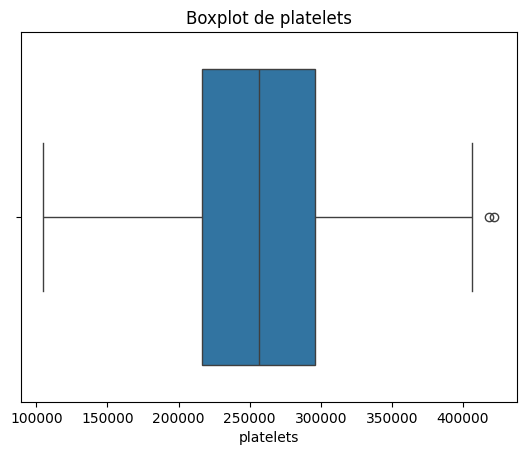

In [ ]:
# boxplot de platelets
sns.boxplot(x=df_heart['platelets'])
plt.title('Boxplot de platelets')
plt.show()

Transformación de Columnas:

Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.

Realizar codificación de variables categóricas utilizando técnicas como One-Hot Encoding.

Escalar las variables numéricas usando StandardScaler u otros métodos de normalización.

In [ ]:
# Definimos los predictores y el target
X = df_heart.drop('DEATH_EVENT', axis=1)
y = df_heart['DEATH_EVENT']

In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definir transformadores.
num_cols = X_train.columns.tolist()
num_cols

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

In [ ]:
# Defino preprocesadores

# Knn
preprocessor_knn = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
])

# Decision Tree
preprocessor_tree = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
])

# Ramdom Forest
preprocessor_rf = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
])



Creación de Pipelines:

Crear pipelines utilizando Pipeline de sklearn para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.

Incluir todos los pasos de preprocesamiento en el pipeline.

In [ ]:
# Pipeline de Modelo K-Neighbors
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor_knn),
    ("model", KNeighborsClassifier())
])

# Pipeline de Modelo Arbol de Decision
pipeline_tree = Pipeline([
    ("preprocessing", preprocessor_tree),
    ("model", DecisionTreeClassifier())
])

# Pipeline de Modelo Ramdom Forest
pipeline_rf = Pipeline([
    ("preprocessing", preprocessor_rf),
    ("model", RandomForestClassifier())
])

Parte 2: Selección de Técnica de Machine Learning

Entrenamiento Inicial:

- Entrenar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost, LGBM).

- Evaluar los modelos utilizando validación cruzada y seleccionar el modelo con el mejor rendimiento inicial.


Comparación de Modelos:

- Comparar los modelos utilizando métricas de rendimiento relevantes (exactitud, precisión, recall, F1-Score, ROC-AUC, etc.).

- Seleccionar la técnica de machine learning más adecuada basándose en las métricas y la naturaleza del problema.

In [ ]:
# Entrenamiento del modelo de KNN.
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'anaemia',
                                                   'creatinine_phosphokinase',
                                                   'diabetes',
                                                   'ejection_fraction',
                                                   'high_blood_pressure',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'sex',
                                                   'smoking', 'time'])])),
                ('model', KNeighborsClassifier())])

In [ ]:
# Entrenamiento del modelo de Arbol de Decision.
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'anaemia',
                                                   'creatinine_phosphokinase',
                                                   'diabetes',
                                                   'ejection_fraction',
                                                   'high_blood_pressure',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'sex',
                                                   'smoking', 'time'])])),
                ('model', DecisionTreeClassifier())])

In [ ]:
# Entrenamiento del modelo de Ramdom Forest.
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'anaemia',
                                                   'creatinine_phosphokinase',
                                                   'diabetes',
                                                   'ejection_fraction',
                                                   'high_blood_pressure',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'sex',
                                                   'smoking', 'time'])])),
                ('model', RandomForestClassifier())])

Comparación de Modelos:

In [ ]:
# modelo KNN
y_pred = pipeline_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo KNN: {accuracy_knn:.2f}")

Accuracy del modelo KNN: 0.70


In [ ]:
# modelo Arbol de Decision
y_pred = pipeline_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo Arbol de Decision: {accuracy_tree:.2f}")

Accuracy del modelo Arbol de Decision: 0.70


In [ ]:
# modelo Ramdom Forest
y_pred = pipeline_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo Ramdom Forest: {accuracy_rf:.2f}")

Accuracy del modelo Ramdom Forest: 0.78


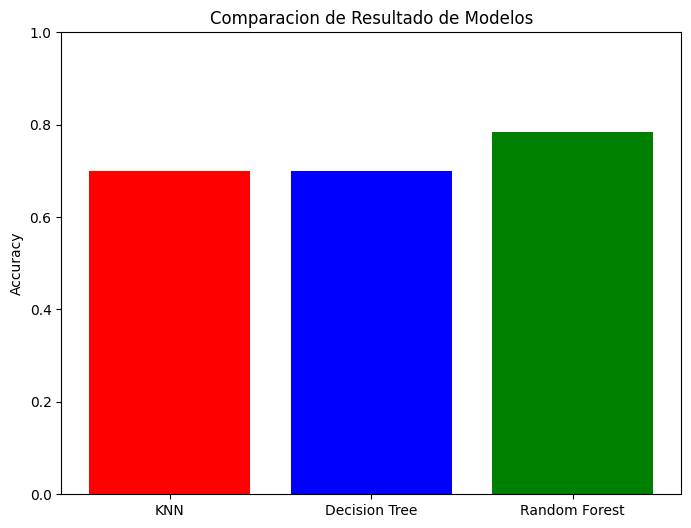

In [ ]:
# grafico de barra para comparar los resultados
models = [ 'KNN', 'Decision Tree', 'Random Forest']

accuracy_scores = [accuracy_knn, accuracy_tree, accuracy_rf]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['red', 'blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparacion de Resultado de Modelos')
plt.show()

Segun el grafico, el mejor modelo es el Ramdom Forest

Parte 3: Optimización de Hiperparámetros

GridSearchCV:
- Implementar GridSearchCV para realizar una búsqueda exhaustiva de los mejores hiperparámetros para el modelo seleccionado.
- Definir el espacio de búsqueda para los hiperparámetros relevantes.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# Optimizacion de hiperparametros de KNN
knn_params = {
    "model__n_neighbors": [3, 5, 7, 10, 15],
    "model__weights": ["uniform", "distance"],
    "model__p": [1, 2]
}

knn_grid = GridSearchCV(pipeline_knn, knn_params, cv=3, scoring="accuracy")
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'anaemia',
                                                                          'creatinine_phosphokinase',
                                                                          'diabetes',
                                                                          'ejection_fraction',
                                                                          'high_blood_pressure',
                                                                          'platelets',
                                                                          'serum_creatinine',
                                                                          'serum_sodium',
                                                                          'sex',
                                                                          'smoking',
                                                                          'time'])])),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [3, 5, 7, 10, 15],
                         'model__p': [1, 2],
                         'model__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Evaluación.
knn_best = knn_grid.best_estimator_
y_pred_knn = knn_best.predict(X_test)

print("KNN")
print("Mejores parámetros:", knn_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN
Mejores parámetros: {'model__n_neighbors': 10, 'model__p': 1, 'model__weights': 'distance'}
Accuracy: 0.7166666666666667


In [ ]:
# Optimizacion de hiperparametros de Arbol de Decision.
tree_params = {
    "model__max_depth": [5, 10, 15, 20],
    "model__min_samples_split": [5, 10, 15, 20],
    "model__min_samples_leaf": [1, 2, 4]
}

tree_grid = GridSearchCV(pipeline_tree, tree_params, cv=3, scoring="accuracy")
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'anaemia',
                                                                          'creatinine_phosphokinase',
                                                                          'diabetes',
                                                                          'ejection_fraction',
                                                                          'high_blood_pressure',
                                                                          'platelets',
                                                                          'serum_creatinine',
                                                                          'serum_sodium',
                                                                          'sex',
                                                                          'smoking',
                                                                          'time'])])),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__max_depth': [5, 10, 15, 20],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [5, 10, 15, 20]},
             scoring='accuracy')

In [ ]:
# Evaluación.
tree_best = tree_grid.best_estimator_
y_pred_tree = tree_best.predict(X_test)

print("Tree ")
print("Mejores parámetros:", tree_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

Tree 
Mejores parámetros: {'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 20}
Accuracy: 0.7333333333333333


In [ ]:
# Optimizacion de hiperparametros de Bosque de Arboles de Decision.
rf_params = {
    "model__n_estimators": [50, 100, 200],
    "model__max_depth": [5, 10, 15],
    "model__min_samples_split": [5, 10, 15],
    "model__min_samples_leaf": [1, 2, 4]
}

rf_grid = GridSearchCV(pipeline_rf, rf_params, cv=3, scoring="accuracy")
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'anaemia',
                                                                          'creatinine_phosphokinase',
                                                                          'diabetes',
                                                                          'ejection_fraction',
                                                                          'high_blood_pressure',
                                                                          'platelets',
                                                                          'serum_creatinine',
                                                                          'serum_sodium',
                                                                          'sex',
                                                                          'smoking',
                                                                          'time'])])),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [5, 10, 15],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [5, 10, 15],
                         'model__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Evaluación.
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

print("Ramdom Forest")
print("Mejores parámetros:", rf_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Ramdom Forest
Mejores parámetros: {'model__max_depth': 15, 'model__min_samples_leaf': 4, 'model__min_samples_split': 15, 'model__n_estimators': 100}
Accuracy: 0.75


RandomizedSearchCV:

Implementar RandomizedSearchCV para realizar una búsqueda aleatoria de los mejores hiperparámetros, especialmente útil si el espacio de búsqueda es grande.

In [ ]:
# Importo las librerias necesarias
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
# Implementar RandomizedSearchCV para KNN
knn_params_rand = {
    "model__n_neighbors": randint(3, 20),
    "model__weights": ["uniform", "distance"],
    "model__p": [1, 2]
}

knn_rand = RandomizedSearchCV(pipeline_knn, knn_params_rand, n_iter=50, cv=3, scoring="accuracy", random_state=42)
knn_rand.fit(X_train, y_train)
# Obtengo los mejores parametros para el modelo y su Accuracy
print("Mejores parámetros:", knn_rand.best_params_)
print("Accuracy:", accuracy_score(y_test, knn_rand.best_estimator_.predict(X_test)))

Mejores parámetros: {'model__n_neighbors': 10, 'model__p': 1, 'model__weights': 'distance'}
Accuracy: 0.7166666666666667


In [ ]:
# Implementar RandomizedSearchCV para Arbol de Decision
tree_params_rand = {
    "model__max_depth": randint(3, 20),
    "model__min_samples_split": randint(2, 25),
    "model__min_samples_leaf": randint(1, 5)
}

tree_rand = RandomizedSearchCV(pipeline_tree, tree_params_rand, n_iter=50, cv=3, scoring="accuracy", random_state=42)
tree_rand.fit(X_train, y_train)

# Obtengo los mejores parametros para el modelo y su Accuracy
print("Mejores parámetros:", tree_rand.best_params_)
print("Accuracy:", accuracy_score(y_test, tree_rand.best_estimator_.predict(X_test)))

Mejores parámetros: {'model__max_depth': 13, 'model__min_samples_leaf': 4, 'model__min_samples_split': 22}
Accuracy: 0.7333333333333333


In [ ]:
# Implementar RandomizedSearchCV para Random Forest
rf_params_rand = {
    "model__n_estimators": randint(10, 200),
    "model__max_depth": randint(3, 20),
    "model__min_samples_split": randint(2, 25),
    "model__min_samples_leaf": randint(1, 5)
}

rf_rand = RandomizedSearchCV(pipeline_rf, rf_params_rand, n_iter=50, cv=3, scoring="accuracy", random_state=42)
rf_rand.fit(X_train, y_train)

# Obtengo los mejores parametros para el modelo y su Accuracy
print("Mejores parámetros:", rf_rand.best_params_)
print("Accuracy:", accuracy_score(y_test, rf_rand.best_estimator_.predict(X_test)))

Mejores parámetros: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 24, 'model__n_estimators': 199}
Accuracy: 0.75


Optuna:

Implementar Optuna para una optimización avanzada de los hiperparámetros, aprovechando técnicas como la optimización bayesiana y el pruning.

In [ ]:
# Instalamos Optuna
!pip install optuna -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 20.0 MB/s eta 0:00:00


In [ ]:
# Importamos Optuna
import optuna

In [ ]:
# Funcion para KNN
def objective_knn(trial):
    n_neighbors = trial.suggest_int("model__n_neighbors", 3, 20)
    weights = trial.suggest_categorical("model__weights", ["uniform", "distance"])
    p = trial.suggest_categorical("model__p", [1, 2])

    pipeline_knn.set_params(model__n_neighbors=n_neighbors,
                            model__weights=weights,
                            model__p=p)

    score = cross_val_score(pipeline_knn, X_train, y_train, cv=3, scoring="accuracy").mean()
    return score

# Creacion y Ejecucion de un Estudio Optuna para KNN
study_knn = optuna.create_study(direction="maximize")
study_knn.optimize(objective_knn, n_trials=50)

print("Optuna para KNN")
print("Mejores parámetros:", study_knn.best_params)
print("Best accuracy:", study_knn.best_value)

[I 2025-07-11 00:09:44,871] A new study created in memory with name: no-name-ceca18aa-da62-4cc4-8d16-60bc64c362ad
[I 2025-07-11 00:09:44,977] Trial 0 finished with value: 0.7445147679324894 and parameters: {'model__n_neighbors': 4, 'model__weights': 'distance', 'model__p': 1}. Best is trial 0 with value: 0.7445147679324894.
[I 2025-07-11 00:09:45,079] Trial 1 finished with value: 0.7237869198312236 and parameters: {'model__n_neighbors': 3, 'model__weights': 'distance', 'model__p': 2}. Best is trial 0 with value: 0.7445147679324894.
[I 2025-07-11 00:09:45,155] Trial 2 finished with value: 0.7488396624472573 and parameters: {'model__n_neighbors': 9, 'model__weights': 'distance', 'model__p': 1}. Best is trial 2 with value: 0.7488396624472573.
[I 2025-07-11 00:09:45,254] Trial 3 finished with value: 0.7280590717299579 and parameters: {'model__n_neighbors': 12, 'model__weights': 'uniform', 'model__p': 2}. Best is trial 2 with value: 0.7488396624472573.
[I 2025-07-11 00:09:45,332] Trial 4 fi

Optuna para KNN
Mejores parámetros: {'model__n_neighbors': 10, 'model__weights': 'distance', 'model__p': 1}
Best accuracy: 0.7697784810126582


In [ ]:
# Funcion para Decision Tree
def objective_tree(trial):
    max_depth = trial.suggest_int("model__max_depth", 3, 20)
    min_samples_split = trial.suggest_int("model__min_samples_split", 2, 25)
    min_samples_leaf = trial.suggest_int("model__min_samples_leaf", 1, 5)

    pipeline_tree.set_params(model__max_depth=max_depth,
                             model__min_samples_split=min_samples_split,
                             model__min_samples_leaf=min_samples_leaf)

    score = cross_val_score(pipeline_tree, X_train, y_train, cv=3, scoring="accuracy").mean()
    return score

# Creacion y Ejecucion de un Estudio Optuna para Decision Tree
study_tree = optuna.create_study(direction="maximize")
study_tree.optimize(objective_tree, n_trials=50)

print("Optuna para Decision Tree")
print("Mejores parámetros:", study_tree.best_params)
print("Best accuracy:", study_tree.best_value)

[I 2025-07-11 00:09:58,132] A new study created in memory with name: no-name-16fcb61c-28dd-49d0-b3da-40fdcd9b6ad1
[I 2025-07-11 00:09:58,352] Trial 0 finished with value: 0.7907700421940929 and parameters: {'model__max_depth': 20, 'model__min_samples_split': 13, 'model__min_samples_leaf': 1}. Best is trial 0 with value: 0.7907700421940929.
[I 2025-07-11 00:09:58,531] Trial 1 finished with value: 0.7866033755274261 and parameters: {'model__max_depth': 6, 'model__min_samples_split': 12, 'model__min_samples_leaf': 1}. Best is trial 0 with value: 0.7907700421940929.
[I 2025-07-11 00:09:58,694] Trial 2 finished with value: 0.7907700421940929 and parameters: {'model__max_depth': 7, 'model__min_samples_split': 14, 'model__min_samples_leaf': 5}. Best is trial 0 with value: 0.7907700421940929.
[I 2025-07-11 00:09:58,734] Trial 3 finished with value: 0.8660864978902953 and parameters: {'model__max_depth': 7, 'model__min_samples_split': 24, 'model__min_samples_leaf': 5}. Best is trial 3 with valu

Optuna para Decision Tree
Mejores parámetros: {'model__max_depth': 7, 'model__min_samples_split': 24, 'model__min_samples_leaf': 5}
Best accuracy: 0.8660864978902953


In [ ]:
# Funcion para Random Forest
def objective_rf(trial):
    n_estimators = trial.suggest_int("model__n_estimators", 10, 200)
    max_depth = trial.suggest_int("model__max_depth", 3, 20)
    min_samples_split = trial.suggest_int("model__min_samples_split", 2, 25)
    min_samples_leaf = trial.suggest_int("model__min_samples_leaf", 1, 5)

    pipeline_rf.set_params(model__n_estimators=n_estimators,
                           model__max_depth=max_depth,
                           model__min_samples_split=min_samples_split,
                           model__min_samples_leaf=min_samples_leaf)

    score = cross_val_score(pipeline_rf, X_train, y_train, cv=3, scoring="accuracy").mean()
    return score

# # Creacion y Ejecucion de un Estudio Optuna para Random Forest
study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=50)

print("Optuna para Ramdom forest")
print("Mejores parámetros:", study_rf.best_params)
print("Best accuracy:", study_rf.best_value)

[I 2025-07-11 00:10:10,056] A new study created in memory with name: no-name-bc3729ba-3954-4001-bdb3-a4ccd018075c
[I 2025-07-11 00:10:11,302] Trial 0 finished with value: 0.8702531645569621 and parameters: {'model__n_estimators': 173, 'model__max_depth': 4, 'model__min_samples_split': 11, 'model__min_samples_leaf': 2}. Best is trial 0 with value: 0.8702531645569621.
[I 2025-07-11 00:10:11,969] Trial 1 finished with value: 0.8785864978902954 and parameters: {'model__n_estimators': 143, 'model__max_depth': 17, 'model__min_samples_split': 10, 'model__min_samples_leaf': 2}. Best is trial 1 with value: 0.8785864978902954.
[I 2025-07-11 00:10:12,573] Trial 2 finished with value: 0.8535337552742616 and parameters: {'model__n_estimators': 124, 'model__max_depth': 20, 'model__min_samples_split': 19, 'model__min_samples_leaf': 5}. Best is trial 1 with value: 0.8785864978902954.
[I 2025-07-11 00:10:13,184] Trial 3 finished with value: 0.8785864978902954 and parameters: {'model__n_estimators': 85,

Optuna para Ramdom forest
Mejores parámetros: {'model__n_estimators': 143, 'model__max_depth': 17, 'model__min_samples_split': 10, 'model__min_samples_leaf': 2}
Best accuracy: 0.8785864978902954


Evaluación de Modelos Optimizados:

- Entrenar el modelo con los mejores hiperparámetros encontrados y evaluar su rendimiento en el conjunto de prueba.

- Comparar el rendimiento del modelo optimizado con el modelo inicial.

In [ ]:
# Optuna para KNN
# Mejores parámetros: {'model__n_neighbors': 10, 'model__weights': 'distance', 'model__p': 1}
# Best accuracy: 0.7697784810126582

knn = KNeighborsClassifier(n_neighbors= 10, p=1, weights='distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("K_Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

K_Neighbors
Accuracy: 0.65


In [ ]:
# Optuna para Decision Tree
# Mejores parámetros: {'model__max_depth': 7, 'model__min_samples_split': 24, 'model__min_samples_leaf': 5}
# Best accuracy: 0.8660864978902953

tree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=24)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Arbol de Decision")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

Arbol de Decision
Accuracy: 0.7333333333333333


In [ ]:
# Optuna para Ramdom forest
# Mejores parámetros: {'model__n_estimators': 143, 'model__max_depth': 17, 'model__min_samples_split': 10, 'model__min_samples_leaf': 2}
# Best accuracy: 0.8785864978902954

rf = RandomForestClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=10, n_estimators=143)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Ramdom Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Ramdom Forest
Accuracy: 0.7


Graficamos los resultados

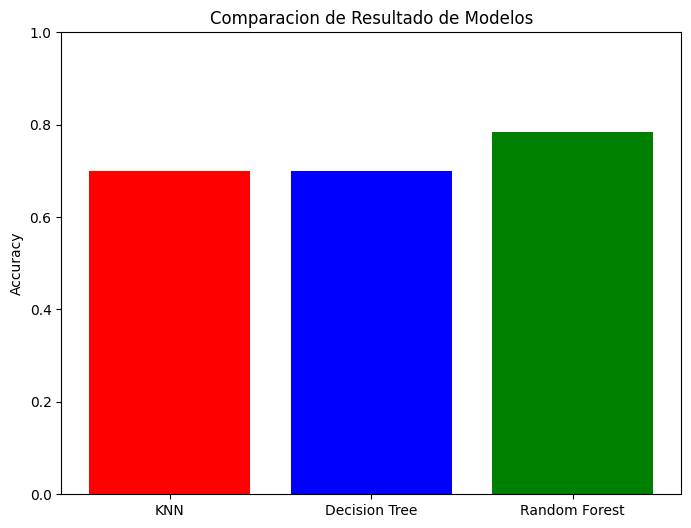

In [ ]:
# Grafico los resultados
models = ['KNN', 'Decision Tree', 'Random Forest' ]

accuracy_scores = [accuracy_knn, accuracy_tree, accuracy_rf ]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['red', 'blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparacion de Resultado de Modelos')
plt.show()

Analizando el grafico que muestra los Accuracy despues de obtener los mejores parametros con ptuna, el mejor modelo sigue siendo Ramdom Forest

Parte 4: Documentación y Entrega

Documentación del Proceso:
- Documentar todos los pasos del preprocesamiento, selección de técnica y optimización en un notebook de Jupyter.
- Incluir explicaciones detalladas y justificaciones para cada decisión tomada.

Subida a GitHub:
- Actualizar el repositorio de GitHub con los notebooks de preprocesamiento, selección de técnica y optimización.
- Incluir los resultados de la optimización y la comparación de modelos.
- Crear un tag de liberación (v2.0.0) para esta versión del proyecto.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')